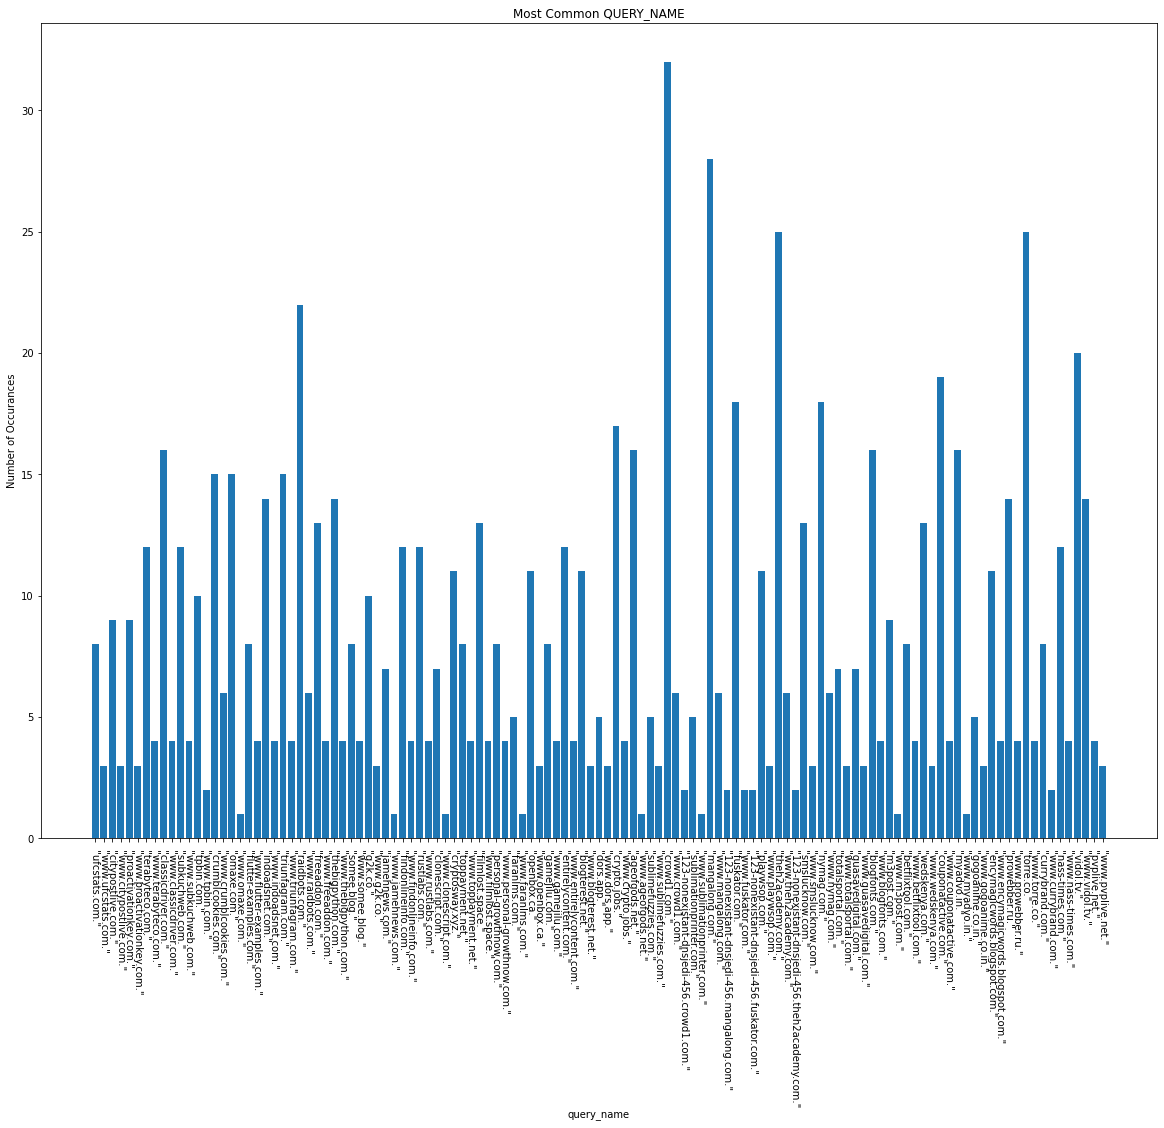

In [208]:
import matplotlib.pyplot as plt
from itertools import islice


length = 0
query_type_dict = {}
field = "query_name"

# function for parsing the data
def data_parser(text, dic):
    for i, j in dic.items():
        text =  text.replace(i,j)
        text = text.rstrip('{')
        text = text.rstrip('}')
        dataSplit = text.split(',');
        if (len(dataSplit) > 1):
            text = dataSplit[0]
            text = text.strip()
            Split = text.split(':');
            length = len(text)
            if field in Split[0]: 
                if (Split[1] in query_type_dict):
                    query_type_dict[Split[1]] += 1
                    #print(query_type_dict)
                else: 
                    query_type_dict[Split[1]] = 1
                return Split[0] + "," + Split[1] + "," + str(query_type_dict[Split[1]]) + "\n"
            else: 
                #return " "
                return Split[0] + "," + Split[1] + " " + "\n"
        else: 
            return text + "\n" 

# open input/output files

inputfile = open('~/alexa1m_outputs/input.txt', 'r', encoding="utf16", errors='ignore')
outputfile = open('~/alexa1m_outputs/output1.csv', 'w')


# dictionary definition of every field

reps = {'"query_type"':'query_type', '"query_name"':'query_name', '"response_type"':'response_type', 
        '"response_name"':'response_name', '"response_ttl"':'response_ttl', '"timestamp"':'timestamp', 
        '"rtt"':'rtt', '"worker_id"':'worker_id', '"status_code"':'status_code', '"ad_flag"': 'ad_flag',
        '"ip4_address"': 'ip4_address', '"ip6_address"': 'ip6_address', '"country"': 'country', '"as"': 'as',
        '"as_full"': 'as_full', '"ip_prefix"': 'ip_prefix', '"cname_name"':'cname_name', '"dname_name"': 'dname_name',
        '"mx_address"':'mx_address', '"mx_preference"': 'mx_preference', '"mxset_hash_algorithm"': 'mxset_hash_algorithm', '"mxset_hash"':'mxset_hash',
        '"ns_address"': 'ns_address', '"nsset_hash_algorithm"': 'nsset_hash_algorithm', '"nsset_hash"':'nsset_hash', '"txt_text"': 'txt_text',
        '"txt_hash_algorithm"':'txt_hash_algorithm', '"txt_hash"':'txt_hash', '"ds_key_tag"':'ds_key_tag', '"ds_algorithm"': 'ds_algorithm',
        '"ds_digest_type"':'ds_digest_type', '"ds_digest"': 'ds_digest', '"dnskey_flags"': 'dnskey_flags', '"dnskey_protocol"': 'dnskey_protocol', 
        '"dnskey_algorithm"':'dnskey_algorithm', '"dnskey_pk_rsa_n"':'dnskey_pk_rsa_n', '"dnskey_pk_rsa_e"': 'dnskey_pk_rsa_e', 
        '"dnskey_pk_rsa_bitsize"': 'dnskey_pk_rsa_bitsize', '"dnskey_pk_eccgost_x"': 'dnskey_pk_eccgost_x', '"dnskey_pk_eccgost_y"': 'dnskey_pk_eccgost_y',
        '"dnskey_pk_dsa_t"': 'dnskey_pk_dsa_t', '"dnskey_pk_dsa_q"': 'dnskey_pk_dsa_q', '"dnskey_pk_dsa_p"': 'dnskey_pk_dsa_p', 
        '"dnskey_pk_dsa_g"': 'dnskey_pk_dsa_g', '"dnskey_pk_dsa_y"': 'dnskey_pk_dsa_y', '"dnskey_pk_eddsa_a"': 'dnskey_pk_eddsa_a', 
        '"dnskey_pk_wire"': 'dnskey_pk_wire', '"nsec_next_domain_name"': 'nsec_next_domain_name', '"nsec_owner_rrset_types"': 'nsec_owner_rrset_types',
        '"nsec3_hash_algorithm"': 'nsec3_hash_algorithm', '"nsec3_flags"': 'nsec3_flags', '"nsec3_iterations"': 'nsec3_iterations', 
         '"nsec3_salt"': 'nsec3_salt', '"nsec3_next_domain_name_hash"':'nsec3_next_domain_name_hash', '"nsec3_owner_rrset_types"': 'nsec3_owner_rrset_types',
        '"nsec3param_hash_algorithm"': 'nsec3param_hash_algorithm', '"nsec3param_flags"': 'nsec3param_flags', '"nsec3param_iterations"': 'nsec3param_iterations',
        '"nsec3param_salt"': 'nsec3param_salt', '"spf_text"': 'spf_text', '"spf_hash_algorithm"': 'spf_hash_algorithm', 
        '"spf_hash"': 'spf_hash', '"soa_mname"':'soa_mname', '"soa_rname"': 'soa_rname','"soa_serial"': 'soa_serial',
        '"soa_refresh"': 'soa_refresh', '"soa_retry"': 'soa_retry', '"soa_expire"': 'soa_expire', '"soa_minimum"': 'soa_minimum',
        '"rrsig_type_covered"': 'rrsig_type_covered', '"rrsig_algorithm"': 'rrsig_algorithm', '"rrsig_labels"': 'rrsig_labels',
        '"rrsig_original_ttl"': 'rrsig_original_ttl', '"rrsig_signature_inception"': 'rrsig_signature_inception', 
        '"rrsig_signature_expiration"': 'rrsig_signature_expiration', '"rrsig_key_tag"': 'rrsig_key_tag', '"rrsig_signer_name"':'rrsig_signer_name',       
        '"rrsig_signature"': 'rrsig_signature', '"cds_key_tag"':'cds_key_tag', '"cds_algorithm"':'cds_algorithm', 
        '"cds_digest_type"': 'cds_digest_type', '"cds_digest"': 'cds_digest', '"cdnskey_flags"': 'cdnskey_flags',    
        '"cdnskey_protocol"': 'cdnskey_protocol', '"cdnskey_algorithm"': 'cdnskey_algorithm', '"cdnskey_pk_rsa_n"':'cdnskey_pk_rsa_n',
        '"cdnskey_pk_rsa_e"': 'cdnskey_pk_rsa_n', '"cdnskey_pk_rsa_bitsize"': 'cdnskey_pk_rsa_bitsize',     
        '"cdnskey_pk_eccgost_x"': 'cdnskey_pk_eccgost_x', '"cdnskey_pk_eccgost_y"': 'cdnskey_pk_eccgost_y', 
        '"cdnskey_pk_dsa_t"': 'cdnskey_pk_dsa_t', '"cdnskey_pk_dsa_q"': 'cdnskey_pk_dsa_q', '"cdnskey_pk_dsa_p"': 'cdnskey_pk_dsa_p', 
        '"cdnskey_pk_dsa_g"': 'cdnskey_pk_dsa_g', '"cdnskey_pk_dsa_g"': 'cdnskey_pk_dsa_g', '"cdnskey_pk_dsa_y"': 'cdnskey_pk_dsa_y', 
        '"cdnskey_pk_eddsa_a"': 'cdnskey_pk_eddsa_a','"cdnskey_pk_wire"': 'cdnskey_pk_wire', '"caa_flags"': 'caa_flags', '"caa_tag"': 'caa_tag', 
        '"caa_value"': 'caa_value', '"tlsa_usage"': 'tlsa_usage', '"tlsa_selector"': 'tlsa_selector', '"tlsa_matchtype"': 'tlsa_matchtype',
        '"tlsa_certdata"': 'tlsa_certdata','"ptr_name"': 'ptr_name'}


# Parsing whole inputfile. May take a while.
# for line in inputfile:
#     outputfile.writelines(data_parser(line, reps))

#Parsing select number of lines of file. Good for generating rapid results on small portions of data 
for i in range(100000):
         line = next(inputfile).strip()
         outputfile.writelines(data_parser(line, reps))
        

#Generating tables for my common occurance of field element
key_list = list(query_type_dict.keys())  
val_list = list(query_type_dict.values())
plt.figure(figsize=(20,15))
plt.bar(key_list, val_list)
plt.ylabel("Number of Occurances")
plt.xlabel(field)
plt.title("Most Common " + field.upper())
plt.xticks(rotation=-90)
plt.show()
        
    
inputfile.close()
outputfile.close()





